In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === 1. Cargar los archivos ===
df_2023 = pd.read_csv("ad_viz_plotval_data.csv")
df_2024 = pd.read_csv("ad_viz_plotval_data (1).csv")


# Agregar columna Year
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Unir en un solo DataFrame
df_total = pd.concat([df_2023, df_2024], ignore_index=True)

# Convertir fecha a datetime
df_total["Date"] = pd.to_datetime(df_total["Date"], errors="coerce")

# Crear columna "Month"
df_total["Month"] = df_total["Date"].dt.month

# === 2. Calcular promedio por Año-Mes (SO₂) ===
monthly_avg = df_total.groupby(["Year", "Month"])["Daily Max 1-hour SO2 Concentration"].mean().reset_index()

print("Promedios mensuales 2023-2024 (SO₂):")
print(monthly_avg.head())

# === 3. Crear variables dummy ===
monthly_avg = pd.get_dummies(monthly_avg, columns=["Year", "Month"], prefix=["Year", "Month"])

print("\nDataset con dummies (primeras filas):")
print(monthly_avg.head())

# === 4. Definir X e y ===
X = monthly_avg.drop(columns=["Daily Max 1-hour SO2 Concentration"])
y = monthly_avg["Daily Max 1-hour SO2 Concentration"]

# Entrenar modelo
model = LinearRegression()
model.fit(X, y)

# === 5. Crear dataset para los 12 meses de 2025 con las mismas dummies ===
months_2025 = pd.DataFrame({
    "Year_2023": [0]*12,
    "Year_2024": [0]*12,
    "Month_1":  [1,0,0,0,0,0,0,0,0,0,0,0],
    "Month_2":  [0,1,0,0,0,0,0,0,0,0,0,0],
    "Month_3":  [0,0,1,0,0,0,0,0,0,0,0,0],
    "Month_4":  [0,0,0,1,0,0,0,0,0,0,0,0],
    "Month_5":  [0,0,0,0,1,0,0,0,0,0,0,0],
    "Month_6":  [0,0,0,0,0,1,0,0,0,0,0,0],
    "Month_7":  [0,0,0,0,0,0,1,0,0,0,0,0],
    "Month_8":  [0,0,0,0,0,0,0,1,0,0,0,0],
    "Month_9":  [0,0,0,0,0,0,0,0,1,0,0,0],
    "Month_10": [0,0,0,0,0,0,0,0,0,1,0,0],
    "Month_11": [0,0,0,0,0,0,0,0,0,0,1,0],
    "Month_12": [0,0,0,0,0,0,0,0,0,0,0,1],
})

# Predecir valores de SO₂ en 2025
pred_2025 = model.predict(months_2025)

months_2025["Year"] = 2025
months_2025["Month"] = np.arange(1,13)
months_2025["Pred_SO2"] = pred_2025

print("\nPredicciones 2025 (SO₂):")
print(months_2025[["Year","Month","Pred_SO2"]])


Promedios mensuales 2023-2024 (SO₂):
   Year  Month  Daily Max 1-hour SO2 Concentration
0  2023      1                            5.321667
1  2023      2                            3.475000
2  2023      3                            4.335484
3  2023      4                            2.935000
4  2023      5                            2.217742

Dataset con dummies (primeras filas):
   Daily Max 1-hour SO2 Concentration  Year_2023  Year_2024  Month_1  Month_2  \
0                            5.321667       True      False     True    False   
1                            3.475000       True      False    False     True   
2                            4.335484       True      False    False    False   
3                            2.935000       True      False    False    False   
4                            2.217742       True      False    False    False   

   Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  Month_10  \
0    False    False    False    False    False    Fal

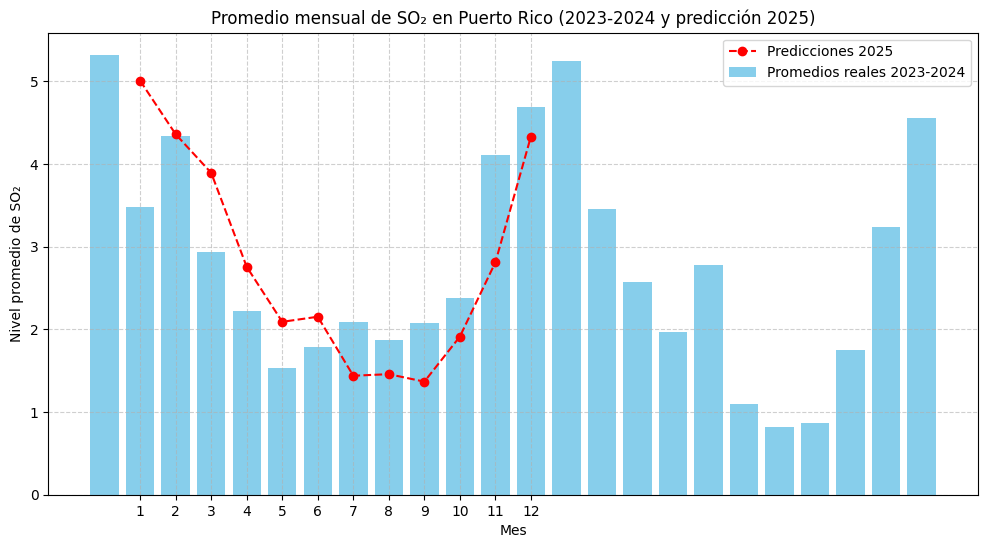

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 📊 Datos reales (2023-2024)
y = monthly_avg["Daily Max 1-hour SO2 Concentration"]  # <-- cambia a tu variable de interés

plt.figure(figsize=(12,6))

# Gráfico de barras para los promedios reales 2023-2024
plt.bar(
    monthly_avg.index,  # eje X (meses)
    y,                  # eje Y (valores reales)
    color="skyblue",
    label="Promedios reales 2023-2024"
)

# Línea para las predicciones de 2025
plt.plot(
    months_2025["Month"],     # eje X (meses del 1 al 12)
    months_2025["Pred_SO2"],  # eje Y (valores predichos)
    "ro--",
    label="Predicciones 2025"
)

# Configuración del gráfico
plt.xticks(np.arange(1,13))
plt.xlabel("Mes")
plt.ylabel("Nivel promedio de SO₂")
plt.title("Promedio mensual de SO₂ en Puerto Rico (2023-2024 y predicción 2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



📊 Comparación 2025 (Predicho vs Real):
    Month  Pred_SO2  Real_SO2
0       1  5.006801  4.175806
1       2  4.359430  4.473214
2       3  3.892742  3.617742
3       4  2.755833       NaN
4       5  2.091129       NaN
5       6  2.152626       NaN
6       7  1.439162       NaN
7       8  1.458042       NaN
8       9  1.367500       NaN
9      10  1.912259       NaN
10     11  2.810833       NaN
11     12  4.332258       NaN


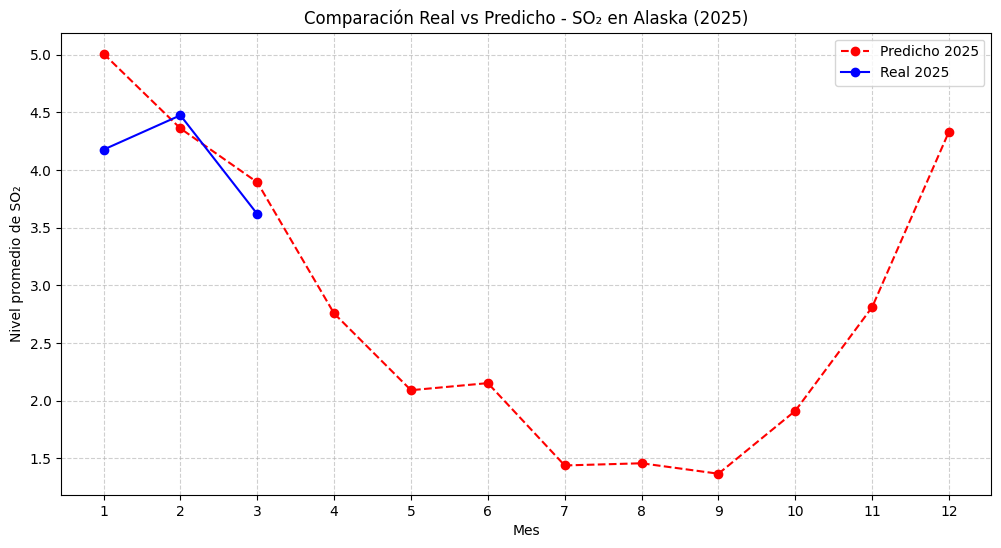

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 📂 Cargar datasets
df_2023 = pd.read_csv("ad_viz_plotval_data.csv")
df_2024 = pd.read_csv("ad_viz_plotval_data (1).csv")
df_2025 = pd.read_csv("ad_viz_plotval_data (2).csv")

# 🏷️ Agregar columna Year
df_2023["Year"] = 2023
df_2024["Year"] = 2024
df_2025["Year"] = 2025

# 🔎 Filtrar Alaska
df_2023 = df_2023[df_2023["State"] == "Alaska"].copy()
df_2024 = df_2024[df_2024["State"] == "Alaska"].copy()
df_2025 = df_2025[df_2025["State"] == "Alaska"].copy()

# 📆 Convertir fecha y extraer mes
for df in [df_2023, df_2024, df_2025]:
    df["Date"] = pd.to_datetime(df["Date"])
    df["Month"] = df["Date"].dt.month

# 📊 Calcular promedios mensuales (2023 y 2024 para entrenar)
df_train = pd.concat([df_2023, df_2024], ignore_index=True)
monthly_avg = df_train.groupby(["Year", "Month"])["Daily Max 1-hour SO2 Concentration"].mean().reset_index()

# 🔄 One-hot encoding de año y mes
monthly_avg = pd.get_dummies(monthly_avg, columns=["Year", "Month"], prefix=["Year", "Month"])

# 📌 Definir X e y
X = monthly_avg.drop(columns=["Daily Max 1-hour SO2 Concentration"])
y = monthly_avg["Daily Max 1-hour SO2 Concentration"]

# 🤖 Entrenar modelo
model = LinearRegression()
model.fit(X, y)

# 📅 Dataset dummy para predicciones 2025 (12 meses)
months_2025 = pd.DataFrame({
    "Year_2023": [0]*12,
    "Year_2024": [0]*12,
    "Month_1":  [1,0,0,0,0,0,0,0,0,0,0,0],
    "Month_2":  [0,1,0,0,0,0,0,0,0,0,0,0],
    "Month_3":  [0,0,1,0,0,0,0,0,0,0,0,0],
    "Month_4":  [0,0,0,1,0,0,0,0,0,0,0,0],
    "Month_5":  [0,0,0,0,1,0,0,0,0,0,0,0],
    "Month_6":  [0,0,0,0,0,1,0,0,0,0,0,0],
    "Month_7":  [0,0,0,0,0,0,1,0,0,0,0,0],
    "Month_8":  [0,0,0,0,0,0,0,1,0,0,0,0],
    "Month_9":  [0,0,0,0,0,0,0,0,1,0,0,0],
    "Month_10": [0,0,0,0,0,0,0,0,0,1,0,0],
    "Month_11": [0,0,0,0,0,0,0,0,0,0,1,0],
    "Month_12": [0,0,0,0,0,0,0,0,0,0,0,1],
})
months_2025["Month"] = range(1,13)

# 🔮 Predicciones para 2025
pred_2025 = model.predict(months_2025.drop(columns=["Month"]))

# 📊 Dataset real 2025 (puede que no tenga los 12 meses)
real_2025 = df_2025.groupby("Month")["Daily Max 1-hour SO2 Concentration"].mean().reset_index()
real_2025.rename(columns={"Daily Max 1-hour SO2 Concentration": "Real_SO2"}, inplace=True)

# 🔗 Unir predicciones con valores reales
comp_2025 = months_2025[["Month"]].copy()
comp_2025["Pred_SO2"] = pred_2025
comp_2025 = comp_2025.merge(real_2025, on="Month", how="left")

print("\n📊 Comparación 2025 (Predicho vs Real):")
print(comp_2025)

# 📈 Visualización comparativa
plt.figure(figsize=(12,6))
plt.plot(comp_2025["Month"], comp_2025["Pred_SO2"], "ro--", label="Predicho 2025")
plt.plot(comp_2025["Month"], comp_2025["Real_SO2"], "bo-", label="Real 2025")

plt.xticks(np.arange(1,13))
plt.xlabel("Mes")
plt.ylabel("Nivel promedio de SO₂")
plt.title("Comparación Real vs Predicho - SO₂ en Alaska (2025)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



📊 Comparación semanal 2025:
   Week  Real_SO2  Year  Pred_SO2
0     1  8.100000  2025  5.585317
1     2  4.457143  2025  5.119231
2     3  3.692857  2025  4.760714
3     4  3.107143  2025  5.076099
4     5  2.350000  2025  4.453571


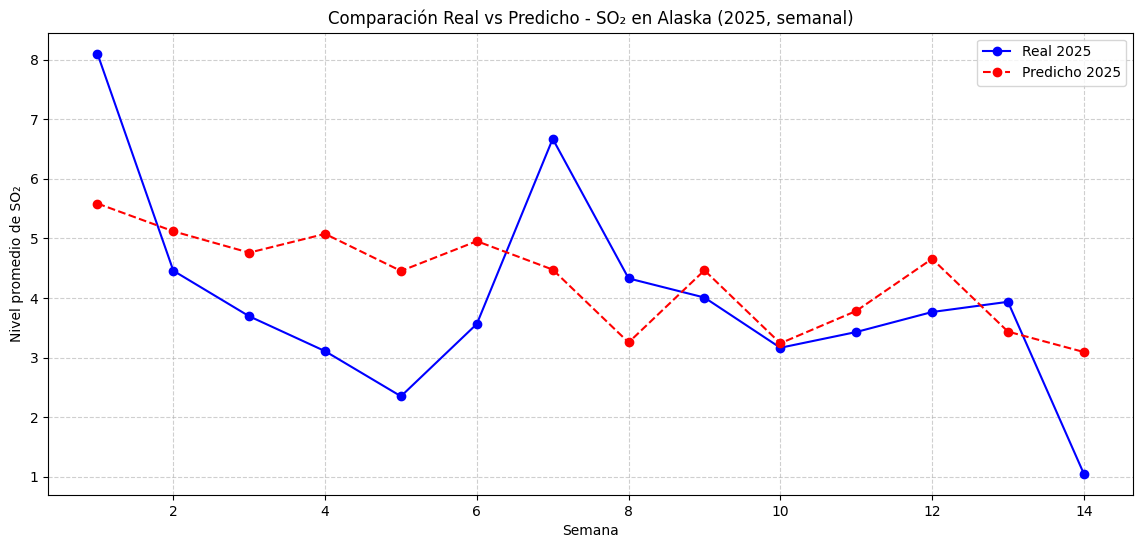

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# =====================
# 1. Cargar datasets
# =====================
df_2023 = pd.read_csv("ad_viz_plotval_data.csv")
df_2024 = pd.read_csv("ad_viz_plotval_data (1).csv")
df_2025 = pd.read_csv("ad_viz_plotval_data (2).csv")

# Agregar columna Year
df_2023["Year"] = 2023
df_2024["Year"] = 2024
df_2025["Year"] = 2025

# =====================
# 2. Unir datos de entrenamiento (2023 + 2024)
# =====================
df_train = pd.concat([df_2023, df_2024], ignore_index=True)

# Filtrar Alaska
df_train = df_train[df_train["State"] == "Alaska"].copy()
df_2025 = df_2025[df_2025["State"] == "Alaska"].copy()

# =====================
# 3. Procesar fechas
# =====================
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train["Week"] = df_train["Date"].dt.isocalendar().week.astype(int)

df_2025["Date"] = pd.to_datetime(df_2025["Date"])
df_2025["Week"] = df_2025["Date"].dt.isocalendar().week.astype(int)

# =====================
# 4. Calcular promedio SEMANAL de 2023-2024
# =====================
weekly_avg = (
    df_train.groupby(["Year", "Week"])["Daily Max 1-hour SO2 Concentration"]
    .mean()
    .reset_index()
)

# Crear variables dummy para año y semana
weekly_avg = pd.get_dummies(weekly_avg, columns=["Year", "Week"], prefix=["Year", "Week"])

# Definir X e y
X = weekly_avg.drop(columns=["Daily Max 1-hour SO2 Concentration"])
y = weekly_avg["Daily Max 1-hour SO2 Concentration"]

# =====================
# 5. Entrenar modelo
# =====================
model = LinearRegression()
model.fit(X, y)

# =====================
# 6. Dataset dummy para predicciones 2025 (52 semanas típicas)
# =====================
weeks_2025 = pd.DataFrame({
    "Year_2023": [0]*52,
    "Year_2024": [0]*52,
})

# Crear variables dummy para cada semana
for w in range(1, 53):
    weeks_2025[f"Week_{w}"] = [1 if i == w-1 else 0 for i in range(52)]

# Alinear columnas con entrenamiento
weeks_2025 = weeks_2025.reindex(columns=X.columns, fill_value=0)

# Predicciones para 2025
pred_2025 = model.predict(weeks_2025)

# =====================
# 7. Dataset real 2025 (promedio semanal)
# =====================
real_2025 = (
    df_2025.groupby("Week")["Daily Max 1-hour SO2 Concentration"]
    .mean()
    .reset_index()
)
real_2025["Year"] = 2025
real_2025.rename(columns={"Daily Max 1-hour SO2 Concentration": "Real_SO2"}, inplace=True)

# Unir con predicciones
comp_2025_weekly = real_2025.copy()
comp_2025_weekly["Pred_SO2"] = pred_2025[:len(real_2025)]

print("\n📊 Comparación semanal 2025:")
print(comp_2025_weekly.head())

# =====================
# 8. Visualización
# =====================
plt.figure(figsize=(14,6))
plt.plot(comp_2025_weekly["Week"], comp_2025_weekly["Real_SO2"], "bo-", label="Real 2025")
plt.plot(comp_2025_weekly["Week"], comp_2025_weekly["Pred_SO2"], "ro--", label="Predicho 2025")
plt.xlabel("Semana")
plt.ylabel("Nivel promedio de SO₂")
plt.title("Comparación Real vs Predicho - SO₂ en Alaska (2025, semanal)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
